In [33]:
# -------------------- #
# Imports              #
# -------------------- #

import numpy as np
import matplotlib.pyplot as plt

In [42]:
# -------------------- #
# Settings             #
# -------------------- #

savefolder = "JURECA_Plots/"

#folders = ["JURECA/Speedtest_1/Timing/", "JURECA/Speedtest_5/Timing/", "JURECA/Speedtest_2/Timing/"]
folders = ["JURECA/Speedtest_2/Timing/", "JURECA/Speedtest_3/Timing/", "JURECA/Speedtest_4/Timing/"]


#N = [3360, 3360, 3360]
N = [3360, 2*3360, 3*3360]
#steps = [1000, 5000, 10000]
steps = [10000, 10000, 10000]

#configs = ["UNIX_config-MPI_Clusters_Speedtest", "UNIX_config-MPI_Clusters_Speedtest_4", "UNIX_config-MPI_Clusters_Speedtest"]
configs = ["UNIX_config-MPI_Clusters_Speedtest", "UNIX_config-MPI_Clusters_Speedtest_2", "UNIX_config-MPI_Clusters_Speedtest_3"]

processes = np.array([1,2,3,4,5,6,7,8,10,12,14,15,16,20,21,24,28,30,32,35,40,42,48,56,60])

colors = ['b', 'g', 'darkviolet']

savename = savefolder + "JURECA_Speedtest_Comparison_N"
save = True

In [43]:
num_setups = len(folders)

# Program run time (total)
times_tot = np.zeros((num_setups, len(processes)))
# Program run time (calculation only)
times_calc = np.zeros((num_setups, len(processes)))
# Total calculation time (program calc_time * number of processes)
times_calc_tot = np.zeros((num_setups, len(processes)))
# Program run time (calculation only) per masspoint
times_calc_per_N = np.zeros((num_setups, len(processes)))
# Program run time (calculation only) per integration step
times_calc_per_step= np.zeros((num_setups, len(processes)))

for i,p in enumerate(processes):
    for k in range(0,num_setups):
        filename = folders[k] + configs[k] + "_" + "p_" + str(p) + "_timing.txt"
        arr = np.genfromtxt(filename, delimiter=":")
        times_tot[k,i] = arr[0,1]
        times_calc[k,i] = arr[2,1]
        times_calc_tot[k,i] = arr[3,1]
        times_calc_per_N[k,i] = times_calc[k,i] / N[k];
        times_calc_per_step[k,i] = times_calc[k,i] / steps[k];
    
# Theoretical 'ideal' time for parallel program, assuming 100% parallel code
# Relative to time for serial program
times_ideal_per_N = np.zeros(len(processes))
times_ideal_per_step = np.zeros(len(processes))
for i,p in enumerate(processes):
    times_ideal_per_N[i] = min(times_calc_per_N[:,0])/p
    times_ideal_per_step[i] = min(times_calc_per_step[:,0])/p

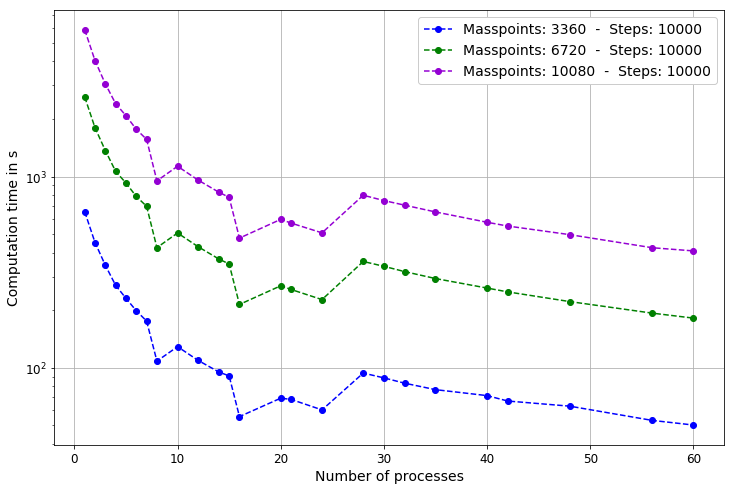

In [44]:
%matplotlib inline

fig = plt.figure(figsize=(12,8), dpi=100);

for k in range(0,num_setups):
    plt.plot(processes, times_calc[k,:], c=colors[k], marker="o", ls="--", label="Masspoints: "+str(N[k])+"  -  Steps: "+str(steps[k]));
#for i,p in enumerate(processes):
#    plt.annotate(p, (p+0.5, times_calc[i]*1.03))
    
plt.yscale('log');
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Computation time in s", fontsize=14)
plt.xlabel("Number of processes", fontsize=14)
plt.grid();
plt.legend(fontsize=14, framealpha=1);

if (save):
    plt.savefig(savename + "_timing.png", dpi=400, bbox_inches='tight')

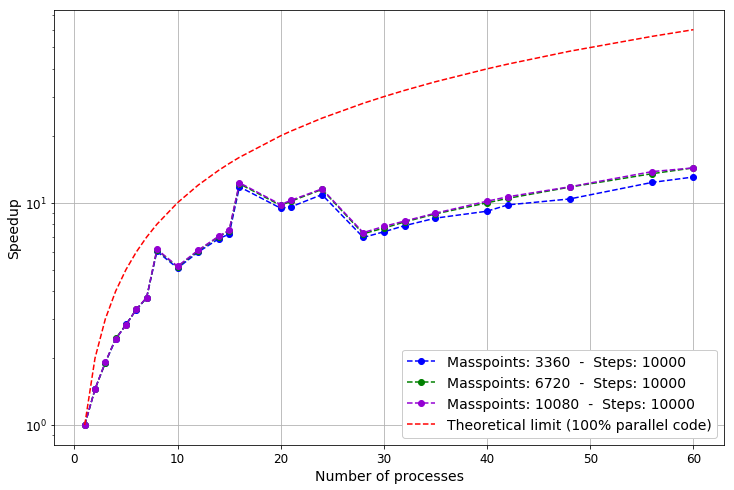

In [45]:
%matplotlib inline

fig = plt.figure(figsize=(12,8), dpi=100);

for k in range(0,num_setups):
    plt.plot(processes, times_calc[k,0]/times_calc[k,:], c=colors[k], marker="o", ls="--", label="Masspoints: "+str(N[k])+"  -  Steps: "+str(steps[k]));
#for i,p in enumerate(processes):
#    plt.annotate(p, (p+0.5, times_calc[i]*1.03))

plt.plot(processes,processes, ls="--", c="r", label="Theoretical limit (100% parallel code)")
    
plt.yscale('log');
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Speedup", fontsize=14)
plt.xlabel("Number of processes", fontsize=14)
plt.grid();
plt.legend(fontsize=14, framealpha=1);

if (save):
    plt.savefig(savename + "_speedup.png", dpi=400, bbox_inches='tight')

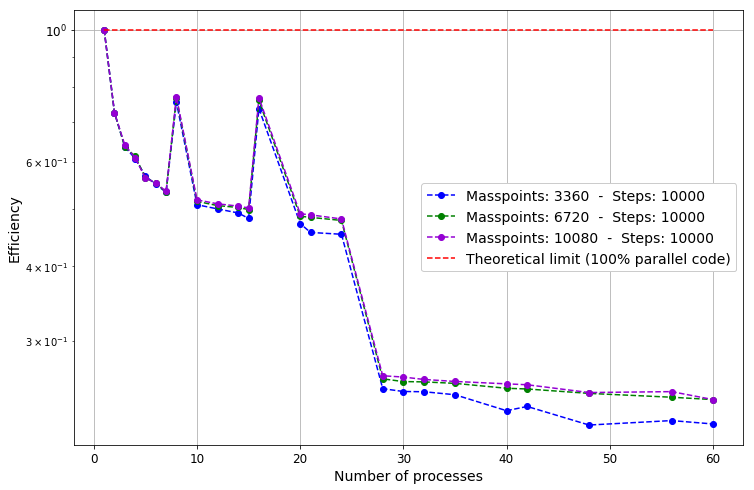

In [46]:
%matplotlib inline

fig = plt.figure(figsize=(12,8), dpi=100);

for k in range(0,num_setups):
    plt.plot(processes, times_calc[k,0]/times_calc[k,:]/processes, c=colors[k], marker="o", ls="--", label="Masspoints: "+str(N[k])+"  -  Steps: "+str(steps[k]));
#for i,p in enumerate(processes):
#    plt.annotate(p, (p+0.5, times_calc[i]*1.03))

plt.plot(processes,processes/processes, ls="--", c="r", label="Theoretical limit (100% parallel code)")
    
plt.yscale('log');
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Efficiency", fontsize=14)
plt.xlabel("Number of processes", fontsize=14)
plt.grid();
plt.legend(fontsize=14, framealpha=1);

if (save):
    plt.savefig(savename + "_efficiency.png", dpi=400, bbox_inches='tight')

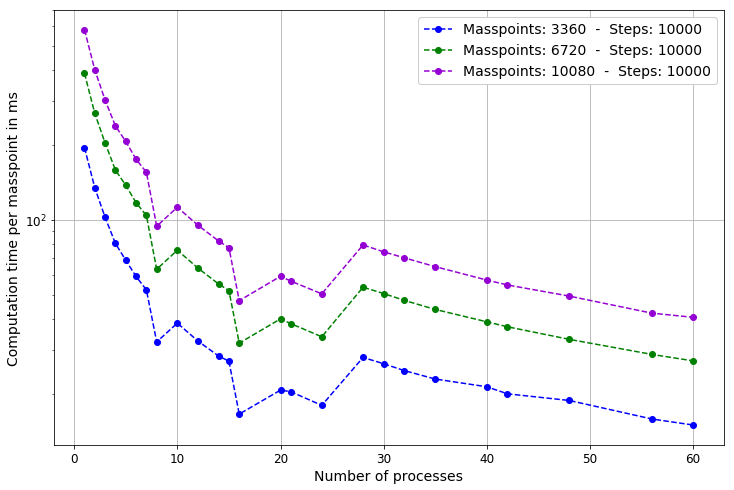

In [47]:
%matplotlib inline

fig = plt.figure(figsize=(12,8), dpi=100);

for k in range(0,num_setups):
    plt.plot(processes, times_calc_per_N[k,:]*1000, c=colors[k], marker="o", ls="--", label="Masspoints: "+str(N[k])+"  -  Steps: "+str(steps[k]));
#for i,p in enumerate(processes):
#    plt.annotate(p, (p+0.5, times_calc_per_N[i]*1000*1.03))
    
#plt.plot(processes, times_ideal_per_N*1000, c="r", marker="^", ls="--", label="Ideal time for 100% parallel code")
    
plt.yscale('log');
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Computation time per masspoint in ms", fontsize=14)
plt.xlabel("Number of processes", fontsize=14)
plt.grid();
plt.legend(fontsize=14, framealpha=1);

if (save):
    plt.savefig(savename + "_timing_per_N.png", dpi=400, bbox_inches='tight')

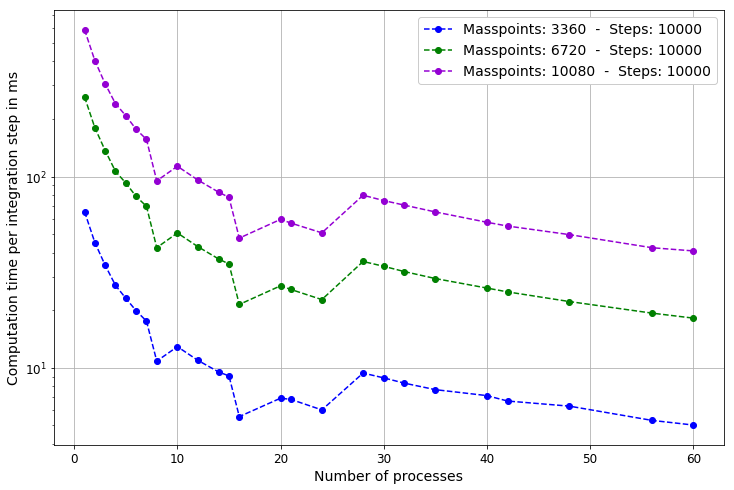

In [48]:
%matplotlib inline

fig = plt.figure(figsize=(12,8), dpi=100);

for k in range(0,num_setups):
    plt.plot(processes, times_calc_per_step[k,:]*1000, c=colors[k], marker="o", ls="--", label="Masspoints: "+str(N[k])+"  -  Steps: "+str(steps[k]));
#for i,p in enumerate(processes):
#    plt.annotate(p, (p+0.5, times_calc_per_step[i]*1000*1.03))
    
#plt.plot(processes, times_ideal_per_step*1000, c="r", marker="^", ls="--", label="Ideal time for 100% parallel code")
    
plt.yscale('log');
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Computation time per integration step in ms", fontsize=14)
plt.xlabel("Number of processes", fontsize=14)
plt.grid();
plt.legend(fontsize=14, framealpha=1);

if (save):
    plt.savefig(savename + "_timing_per_step.png", dpi=400, bbox_inches='tight')

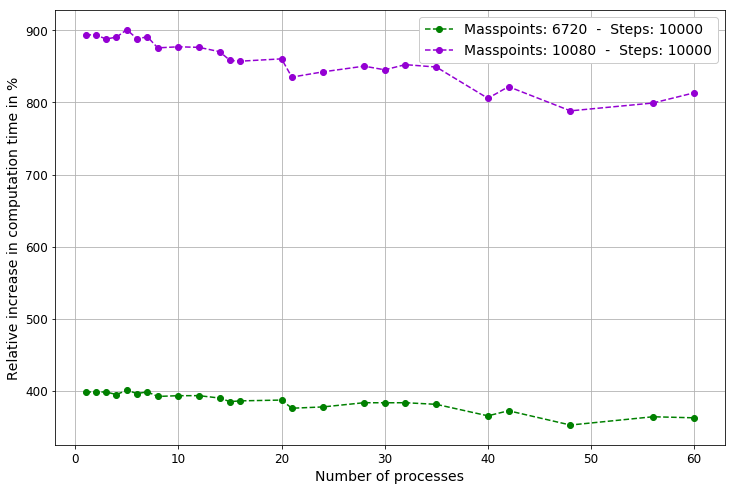

In [49]:
%matplotlib inline

fig = plt.figure(figsize=(12,8), dpi=100);

for k in range(1,num_setups):
    plt.plot(processes, times_calc[k,:]/times_calc[0,:]*100, c=colors[k], marker="o", ls="--", label="Masspoints: "+str(N[k])+"  -  Steps: "+str(steps[k]));
#for i,p in enumerate(processes):
#    plt.annotate(p, (p+0.5, times_calc_per_N[i]*1000*1.03))
    
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Relative increase in computation time in %", fontsize=14)
plt.xlabel("Number of processes", fontsize=14)
plt.grid();
plt.legend(fontsize=14, framealpha=1);

if (save):
    plt.savefig(savename + "_timing_rel_increase.png", dpi=400, bbox_inches='tight')